# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pandas as pd
from statistics import mean, median, mode, stdev
import matplotlib.pyplot
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [102]:
# your answer here
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
# your answer here
temp[temp['State']=="New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
# your answer here
temp[temp['State']=="New York"].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [23]:
# your answer here
temp[temp["Temperature"]>15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [24]:
# your answer here
temp.loc[temp["Temperature"]>15,['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [28]:
# your answer here
temp.loc[(temp["Temperature"]>15) & (temp["Temperature"]<20),['City']]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [37]:
# your answer here
print("The temperature mean of New York state is", temp[temp['State']=="New York"].mean())
print("With a standard desviation of ", temp[temp['State']=="New York"].std(),"\n")

print("The temperature mean of New Connecticut state is", temp[temp['State']=="Connecticut"].mean())
print("With a standard Connecticut of ", temp[temp['State']=="Connecticut"].std(),"\n")

print("The temperature mean of New Jersey state is", temp[temp['State']=="New Jersey"].mean())
print("With a standard desviation of ", temp[temp['State']=="New Jersey"].std(),"\n")

The temperature mean of New York state is Temperature    10.740741
dtype: float64
With a standard desviation of  Temperature    8.133404
dtype: float64 

The temperature mean of New Connecticut state is Temperature    15.833333
dtype: float64
With a standard Connecticut of  Temperature    1.964186
dtype: float64 

The temperature mean of New Jersey state is Temperature    21.111111
dtype: float64
With a standard desviation of  Temperature    1.571348
dtype: float64 



# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [38]:
# your answer here
employee=pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [42]:
# your answer here
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Count'>

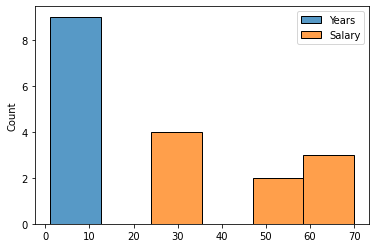

In [50]:
# your answer here
sns.histplot(employee)
# A frquency histogram is not agood way of representing this data.

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

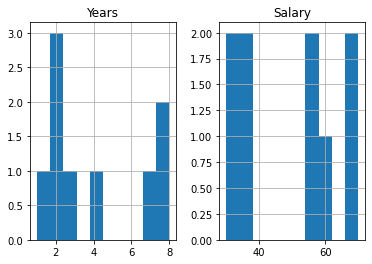

In [52]:
employee.hist()

#### What's the average salary in this company?

In [53]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [54]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [55]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [57]:
# your answer here
employee.loc[employee["Salary"]==employee['Salary'].min(),['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [58]:
# your answer here
employee[employee['Name']=="David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [83]:
# your answer here
employee.loc[employee['Name']=='David',['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate

In [72]:
# your answer here
employee.loc[employee["Title"]=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [73]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [74]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [75]:
# your answer here
employee.loc[(employee["Title"]=='associate')&(employee["Salary"]>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [81]:
# your answer here
employee.groupby(['Years']).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [84]:
# your answer here
employee.groupby(['Title'])['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - 

`In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into 

continuous intervals with equal 

probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the

total distribution are called quartiles.`

<AxesSubplot:>

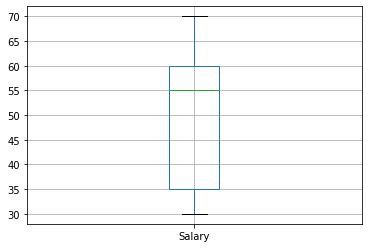

In [91]:
# draw boxplot here
employee.boxplot(column=['Salary'])

In [99]:
# print first quartile here
employee["Salary"].quantile(0.25)

35.0

In [100]:
# print third quartile here
employee["Salary"].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [95]:
# your answer here
employee.groupby(['Gender']).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [97]:
# your answer here
employee.groupby(['Department']).describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [101]:
# your answer here
employee.groupby(['Department'])['Salary'].apply(lambda x: x.max()-x.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [5]:
# your answer here
orders=pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [106]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [107]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [108]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


####  What is the average Purchase Price?

In [110]:
# your answer here
orders["UnitPrice"].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [111]:
# your answer here
orders["UnitPrice"].max()

8142.75

In [112]:
# your answer here
orders["UnitPrice"].min()

0.0

#### Select all the customers we have in Spain

In [114]:
# your answer here
orders[orders["Country"]=='Spain'].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [130]:
# your answer here
orders.loc[orders['Country']=='Spain',['CustomerID']].value_counts().head(5)

CustomerID
12540         478
12484         346
12539         273
17097         211
12597         206
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [142]:
# your answer here
orders.loc[orders['Quantity']>50].groupby(["CustomerID"]).sum().head(3)

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12346,61619,541431,2011,1,2,10,74215,1.04,77183.60
12347,148290,549222,2011,4,4,10,240,1.04,249.60
12348,1777269,10344381,38199,154,68,286,2096,12.51,1236.64


#### Select orders from Spain that are above 50 items

In [141]:
# your answer here
orders.loc[(orders['Quantity']>50)&(orders['Country']=="Spain")].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


### Select all free orders

In [143]:
# your answer here
orders.loc[orders['amount_spent']==0].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [145]:
# your answer here
orders.loc[orders['Description'].str.contains('lunch bag')].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [147]:
# your answer here
orders.loc[(orders['Description'].str.contains('lunch bag')) & (orders['year']==2011)].head(3)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

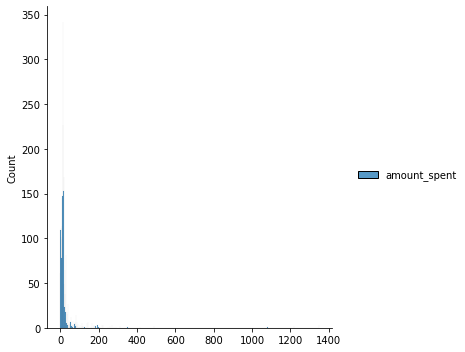

In [166]:
# your answer here
sns.displot(orders.loc[orders['Country']=='Spain',['amount_spent']])


#### Select all orders made in the month of August

In [168]:
# your answer here
orders.loc[orders['month']==8].head(3)counts

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [15]:
# your answer here
orders[orders['month']==8].value_counts().groupby('Country').sum()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
dtype: int64

#### What's the  average amount of money spent by country

In [24]:
# your answer here
orders.groupby(['Country']).mean()['amount_spent']

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [25]:
# your answer here

orders.loc[orders['UnitPrice']==orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [27]:
orders.groupby(['year']).mean()['amount_spent']

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64